In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import json
import re
import pickle
from pathlib import Path
from mimas.helper.fileio import NumpyEncoder
import scipy.stats

import seaborn as sns
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Helvetica']
rcParams['font.size'] = 12
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
rcParams['svg.fonttype'] = 'none'

path_data = Path().cwd().parent / 'data'

path_figures = Path().cwd().parent / 'figures'
path_figures.mkdir(parents=True, exist_ok=True)

In [2]:
datasource = "mona"

all_df = []
for file_spec in (path_data/datasource/"spectral_library").glob("*.pkl"):
    all_spec = pickle.load(open(file_spec, "rb"))
    entropy = [scipy.stats.entropy(spec["peaks"][:, 1]) for spec in all_spec]
    entropy = np.array(entropy, dtype=np.float32)
    df_entropy = pd.DataFrame(entropy, columns=["entropy"])
    df_entropy["filename"] = file_spec.stem
    df_entropy["pathname"] = file_spec.parent.stem
    all_df.append(df_entropy)

df = pd.concat(all_df, axis=0)

In [3]:
# Extract charge from file name
df["charge"] = df["filename"].str.extract(r"charge_(.)-")

# Extract spectra number from file name
df["spectra"] = df["filename"].str.extract(r"-number_(\d+)$").astype(int)

df


,entropy,filename,pathname,charge,spectra
0,0.693147,spectra-charge_P-number_100,spectral_library,P,100
1,1.454708,spectra-charge_P-number_100,spectral_library,P,100
2,0.687419,spectra-charge_P-number_100,spectral_library,P,100
3,1.164300,spectra-charge_P-number_100,spectral_library,P,100
4,1.408293,spectra-charge_P-number_100,spectral_library,P,100
...,...,...,...,...,...
999995,1.062734,spectra-charge_N-number_1000000,spectral_library,N,1000000
999996,1.062734,spectra-charge_N-number_1000000,spectral_library,N,1000000
999997,0.642332,spectra-charge_N-number_1000000,spectral_library,N,1000000
999998,1.062734,spectra-charge_N-number_1000000,spectral_library,N,1000000


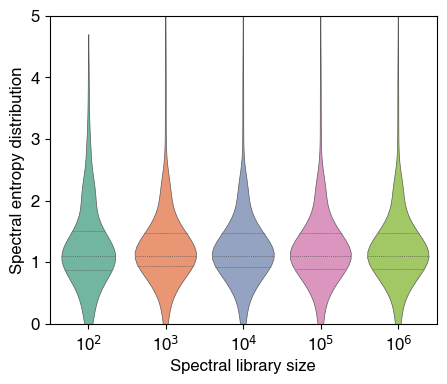

In [4]:
df_plot = df

# Make a violin plot
fig, ax = plt.subplots(figsize=(5, 4))
color_palette = sns.color_palette("Set2", 5)

sns.violinplot(x="spectra", y="entropy", data=df_plot, ax=ax, inner="quartile", linewidth=0.5, palette=color_palette, bw=0.4)

ax.set_xticklabels(["10$^{}$".format(int(np.log10(int(x.get_text())))) for x in ax.get_xticklabels()])

# Modify the x-axis title
ax.set_xlabel("Spectral library size")
ax.set_ylabel("Spectral entropy distribution")

# Set the y-axis limits
ax.set_ylim(0, 5)

# Save the figure
fig.savefig(path_figures/f"50_entropy_distribution-{datasource}.svg", bbox_inches="tight", dpi=1200)

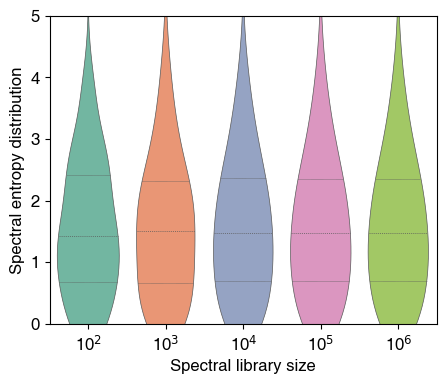

In [5]:
datasource = "gnps"

all_df = []
for file_spec in (path_data/datasource/"spectral_library").glob("*.pkl"):
    all_spec = pickle.load(open(file_spec, "rb"))
    entropy = [scipy.stats.entropy(spec["peaks"][:, 1]) for spec in all_spec]
    entropy = np.array(entropy, dtype=np.float32)
    df_entropy = pd.DataFrame(entropy, columns=["entropy"])
    df_entropy["filename"] = file_spec.stem
    df_entropy["pathname"] = file_spec.parent.stem
    all_df.append(df_entropy)

df = pd.concat(all_df, axis=0)

# Extract charge from file name
df["charge"] = df["filename"].str.extract(r"charge_(.)-")

# Extract spectra number from file name
df["spectra"] = df["filename"].str.extract(r"-number_(\d+)$").astype(int)

df_plot = df

# Make a violin plot
fig, ax = plt.subplots(figsize=(5, 4))
color_palette = sns.color_palette("Set2", 5)

sns.violinplot(x="spectra", y="entropy", data=df_plot, ax=ax, inner="quartile", linewidth=0.5, palette=color_palette, bw=0.4)

ax.set_xticklabels(["10$^{}$".format(int(np.log10(int(x.get_text())))) for x in ax.get_xticklabels()])

# Modify the x-axis title
ax.set_xlabel("Spectral library size")
ax.set_ylabel("Spectral entropy distribution")

# Set the y-axis limits
ax.set_ylim(0, 5)

# Save the figure
fig.savefig(path_figures/f"50_entropy_distribution-{datasource}.svg", bbox_inches="tight", dpi=1200)

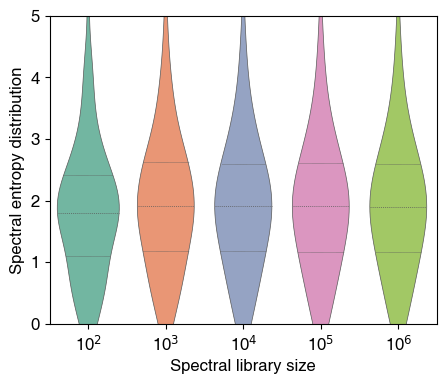

In [6]:
datasource = "public_repository"

all_df = []
for file_spec in (path_data/datasource/"spectral_library").glob("*.pkl"):
    all_spec = pickle.load(open(file_spec, "rb"))
    entropy = [scipy.stats.entropy(spec["peaks"][:, 1]) for spec in all_spec]
    entropy = np.array(entropy, dtype=np.float32)
    df_entropy = pd.DataFrame(entropy, columns=["entropy"])
    df_entropy["filename"] = file_spec.stem
    df_entropy["pathname"] = file_spec.parent.stem
    all_df.append(df_entropy)

df = pd.concat(all_df, axis=0)

# Extract charge from file name
df["charge"] = df["filename"].str.extract(r"charge_(.)-")

# Extract spectra number from file name
df["spectra"] = df["filename"].str.extract(r"-number_(\d+)$").astype(int)

df_plot = df

# Make a violin plot
fig, ax = plt.subplots(figsize=(5, 4))
color_palette = sns.color_palette("Set2", 5)

sns.violinplot(x="spectra", y="entropy", data=df_plot, ax=ax, inner="quartile", linewidth=0.5, palette=color_palette, bw=0.4)

ax.set_xticklabels(["10$^{}$".format(int(np.log10(int(x.get_text())))) for x in ax.get_xticklabels()])

# Modify the x-axis title
ax.set_xlabel("Spectral library size")
ax.set_ylabel("Spectral entropy distribution")

# Set the y-axis limits
ax.set_ylim(0, 5)

# Save the figure
fig.savefig(path_figures/f"50_entropy_distribution-{datasource}.svg", bbox_inches="tight", dpi=1200)